## Exploring Price Dynamics: Vegetable Prices in 2023 and 2024

## Table of contents
* [1. introduction](#project-description)
* [2. Importing packages and Data loading]()
* [3. Data cleanup and checkup]()
* [4. Explaratory Data analysis]()
* [5. Conclusion]()
* [5. Recomendations]() 

# Introduction

The global agricultural sector is characterized by constant fluctuations in prices, influenced by various factors such as weather conditions, supply and demand dynamics, economic policies, and consumer preferences. Vegetable prices, in particular, are sensitive to these factors, often exhibiting significant volatility over short periods. In this report, we delve into the analysis of vegetable prices specifically for the years 2023 and 2024, aiming to shed light on the intricate dynamics of the vegetable market during this timeframe. By closely examining price data and identifying trends, fluctuations, and potential driving factors, this study seeks to provide stakeholders with valuable insights into short-term price dynamics and their implications. Understanding the factors influencing vegetable prices in 2023 and 2024 is crucial for stakeholders across the supply chain, including producers, distributors, retailers, policymakers, and consumers, as it enables informed decision-making and strategic planning in response to market conditions. Moreover, by focusing on a limited timeframe, this analysis allows for a more targeted exploration of short-term trends and provides a foundation for further research into the broader trends shaping the vegetable market in the years to come.


*Problem Statement:*

The agricultural sector, particularly vegetable prices, experiences notable fluctuations influenced by various factors like weather conditions, supply-demand dynamics, and economic policies. Understanding these dynamics is essential for stakeholders to make informed decisions. In this study, we aim to analyze vegetable prices in 2023 and 2024 to uncover trends and factors driving short-term price variations. By examining price data and identifying key influencers, we seek to provide valuable insights for stakeholders across the supply chain, enabling them to adapt strategies and make informed decisions amidst market uncertainties. This analysis not only offers a focused exploration of short-term trends but also serves as a foundation for broader market trend research in the future.

One of the most important part is securing all the required packages to avoid encountering errors and making sure that the 
dataset is imported and defined properly

In [45]:
import pandas as pd # importing the Pandas package with an alias, pd
import numpy as np # importing the Numpy package with an alias, np
import matplotlib.pyplot as plt # importing the Matplotlib.pyplo package with an alias, plt
import seaborn as sns # importing the Seaborn package with an alias, sns
import warnings 
price_df = pd.read_csv("prices.csv")

Next up we check the DataFrame to see if it loaded correctly.

In [46]:
price_df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [47]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


Looking at the table, there are no visible errors, but this doesn't mean that we'll leave our table as it is.

We are going to do a sweep by digging into our data to comfirm if indeed there are no errors, *buckle up*

# Data cleanup and checkup

Also known as `data cleansing` or `data cleaning`, refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis or other purposes. It involves several tasks aimed at ensuring that the data is accurate, complete, and consistent.

It is an essential step in the data analysis process as it helps improve the quality, reliability, and usability of the data, leading to more accurate and insightful analysis results.
Below are some common tasks involved in data clean up:

1. *Check for Missing Values* AND *Handle Missing Values*: identify missing values in the DataFrame and you can choose to drop rows with missing values, fill them with a specific value, or use more advanced imputation techniques.
2. *Check for Duplicates* AND *Handle Duplicates*: Identify duplicate rows in the DataFrame and if they are found, you can choose to drop them.
3. *Data Type Conversion*: Ensure that the data types of columns are appropriate for analysis.
4. *Check Data Consistency*: Look for inconsistent or erroneous data entries and correct them manually if necessary.

In [48]:
#1.Check for missing inputs using the function isnull()
missing_values = price_df.isnull().sum()
print(missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


In [49]:
#2.Check for duplicates using the function duplicated()
duplicates = price_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [50]:
#3.Convert 'Price Dates' to datetime format
price_df['Price Dates'] = pd.to_datetime(price_df['Price Dates'], format = '%d-%m-%Y')
print(price_df.dtypes)

Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                             int64
Onion                            float64
Potato                             int64
Brinjal                            int64
Garlic                             int64
Peas                               int64
Methi                              int64
Green Chilli                     float64
Elephant Yam (Suran)               int64
dtype: object


In [51]:
# Get the unique price_dates
unique_price_dates = price_df['Price Dates'].unique()

# Count the number of unique price_dates
num_unique_price_dates = len(unique_price_dates)
print(num_unique_price_dates)

287


*Create two columns of dates with one focusing only on the months and the other focusing on the years*

In [52]:
# Create a new column with just the year
price_df['Year'] = price_df['Price Dates'].dt.year

In [53]:
# Create a new column with just the month
price_df['Month'] = price_df['Price Dates'].dt.month

In [54]:
price_df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Year,Month
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,2023,1
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,2023,1
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,2023,1
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,2023,1
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023-12-27,45.0,16,30.0,20,70,260,40,16,40.0,25,2023,12
283,2023-12-28,45.0,16,30.0,20,70,260,30,20,45.0,25,2023,12
284,2023-12-29,45.0,16,30.0,22,80,260,30,18,50.0,25,2023,12
285,2023-12-31,45.0,16,26.0,20,60,250,40,16,50.0,40,2023,12


## Final data checkup

Conducting a thorough assessment to ensure the data is in a suitable state for analysis

In [55]:
unique_years = price_df['Year'].unique()

# Count the number of unique price_dates
num_unique_years = len(unique_years)
print(num_unique_years)
print(unique_years)

2
[2023 2024]


In [56]:
unique_months = price_df['Month'].unique()

# Count the number of unique price_dates
num_unique_months = len(unique_months)
print(num_unique_months)
print(unique_months)

12
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [57]:
import calendar
# Convert month numbers to month names
price_df['Month Names'] = price_df['Month'].apply(lambda x: calendar.month_name[x])

# Print the DataFrame to see the updated column
print(price_df)

    Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    2023-01-01                    35.0      18   22.0      20       30   
1    2023-01-02                    35.0      16   22.0      20       30   
2    2023-01-03                    35.0      16   21.0      20       30   
3    2023-01-04                    30.0      16   21.0      22       25   
4    2023-01-08                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  2023-12-27                    45.0      16   30.0      20       70   
283  2023-12-28                    45.0      16   30.0      20       70   
284  2023-12-29                    45.0      16   30.0      22       80   
285  2023-12-31                    45.0      16   26.0      20       60   
286  2024-01-01                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  Year  Month  \
0        50    25     

In [58]:
unique_month_nam = price_df['Month Names'].unique()
print(unique_month_nam)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [59]:
price_df.drop(columns= ['Month'],inplace = True)
price_df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Year,Month Names
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,2023,January
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,2023,January
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,2023,January
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,2023,January
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,2023,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023-12-27,45.0,16,30.0,20,70,260,40,16,40.0,25,2023,December
283,2023-12-28,45.0,16,30.0,20,70,260,30,20,45.0,25,2023,December
284,2023-12-29,45.0,16,30.0,22,80,260,30,18,50.0,25,2023,December
285,2023-12-31,45.0,16,26.0,20,60,250,40,16,50.0,40,2023,December


Note that on the cell above we remove the column `Month`? this is because we only need the `Month names` for our analysis

# Exploratory Data Analysis(EDA)

EDA involves analyzing datasets to summarize their primary attributes, often employing visual techniques.
It also aids in revealing patterns, identifying anomalies, and testing hypotheses to derive insights and guide subsequent analysis.

1. *Summary statistics*: Calculate descriptive statistics such as mean, median, mode, standard deviation, and range to understand the distribution and central tendencies of the data.

2. *Data visualization*: Create visualizations such as histograms, box plots, scatter plots, and heatmaps to explore relationships, patterns, and distributions within the data.

3. *Outlier detection*: Identify outliers that may skew the analysis and decide whether to remove, adjust, or keep them based on domain knowledge and analysis goals.

4. *Feature engineering*: Create new features or transform existing ones to improve the performance of machine learning models or to gain additional insights from the data.

5. *Hypothesis testing*: Test hypotheses or assumptions about the data using statistical tests to validate or refute theories about the relationships within the data.

6. *Iterative exploration*: Repeat the above steps iteratively, refining your analysis based on the insights gained and any new questions that arise during the exploration process.


We start by calling warnings in order to supress all warnings that might be distracting

In [60]:
warnings.filterwarnings('ignore')

*Mean values for each vebetable over months*

In [61]:
def mean_prices_by_Months(df,column):
    return df.groupby([column]).agg({'Bhindi (Ladies finger)': 'mean', 'Tomato': 'mean', 'Onion': 'mean', 'Potato': 'mean',
                                     'Brinjal': 'mean','Garlic': 'mean','Peas': 'mean','Methi': 'mean','Green Chilli': 'mean',
                                     'Elephant Yam (Suran)': 'mean'})

In [62]:
mean_prices_by_Months(price_df,'Year') 

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Year,,,,,,,,,,
2023,29.38986,16.006993,20.690559,18.587413,31.590909,132.657343,66.751748,20.402098,44.066888,28.811189
2024,45.00000,16.000000,9.000000,18.000000,50.000000,260.000000,40.000000,15.000000,60.000000,25.000000


In [63]:
mean_prices_by_Months(price_df,'Month Names')

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Month Names,,,,,,,,,,
April,30.229167,16.000000,9.354167,15.500000,24.166667,82.291667,67.958333,13.125000,37.922083,27.083333
August,24.040000,16.000000,21.480000,20.200000,31.000000,156.400000,77.200000,9.000000,42.800000,35.640000
December,45.913043,16.000000,35.608696,20.304348,52.173913,267.826087,37.826087,15.086957,35.217391,30.217391
February,35.979167,16.000000,12.187500,14.958333,32.750000,73.750000,31.041667,8.125000,40.083333,27.500000
January,38.277778,16.111111,17.416667,20.388889,39.444444,72.222222,26.166667,10.333333,38.611111,28.333333
July,25.160000,16.000000,16.560000,19.720000,34.200000,143.400000,105.600000,94.320000,73.000000,30.680000
June,23.220000,16.000000,13.720000,20.280000,32.800000,98.000000,64.400000,15.960000,55.200000,24.760000
March,32.980769,16.000000,11.384615,13.615385,22.153846,79.038462,38.461538,7.192308,45.576923,24.961538
May,21.620000,16.000000,10.680000,20.320000,24.400000,92.200000,63.000000,11.520000,37.560000,24.600000


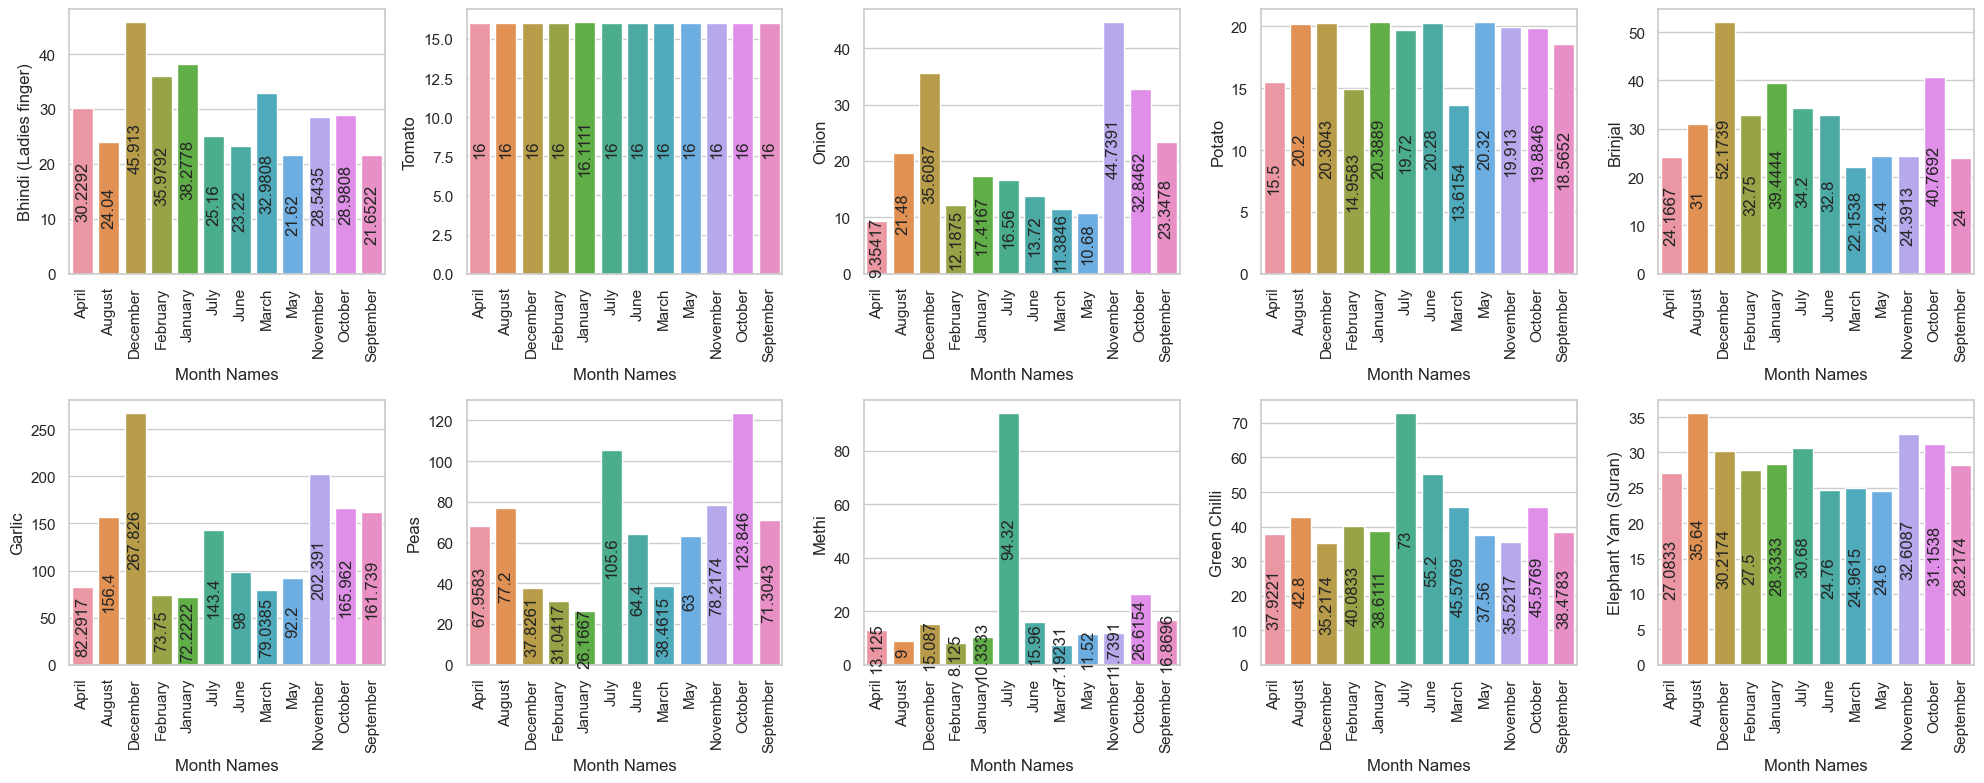

In [64]:
grouped = price_df.groupby("Month Names")
cols = price_df.columns[1:-1]
index = 0
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
for i in range(2):
    for j in range(5):
        means = grouped[cols[index]].mean()
        sns.barplot(x=means.index, y=means, ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, label_type="center", rotation=90)
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=90)
        index += 1
        
plt.tight_layout()
plt.show()

 
- The analysis of vegetable prices across different regions reveals distinct seasonal patterns in vegetable production. Methi, green chilli, and peas thrive predominantly in July, while bhindi, brinjal, and garlic show optimal growth in December. In contrast, tomatoes exhibit consistent performance throughout the year. These findings suggest that understanding the seasonal variations in vegetable production can inform agricultural planning and market strategies, facilitating efficient resource allocation and supply chain management.

- It also shows that some vegetables, including tomatoes, potatoes, and elephant yam, retain more constant prices throughout the year, whereas vegetables such as methi, peas, garlic, retain different monthly prices throughout the year

In [65]:
price_df.describe()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Year
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909,2023.003484
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000,2023.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000,2023.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000,2023.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000,2023.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000,2024.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973,0.059028


Vegetables with the highest average prices 
1. `Garlic`
2. `Peas`,
3. `Green Chilli`


Vegetables with the lowest average prices
1. `Tomato`
2. `Potato`
3. `Methi`

In [66]:
price_df['Month Names'] = price_df['Month Names'].astype('category')

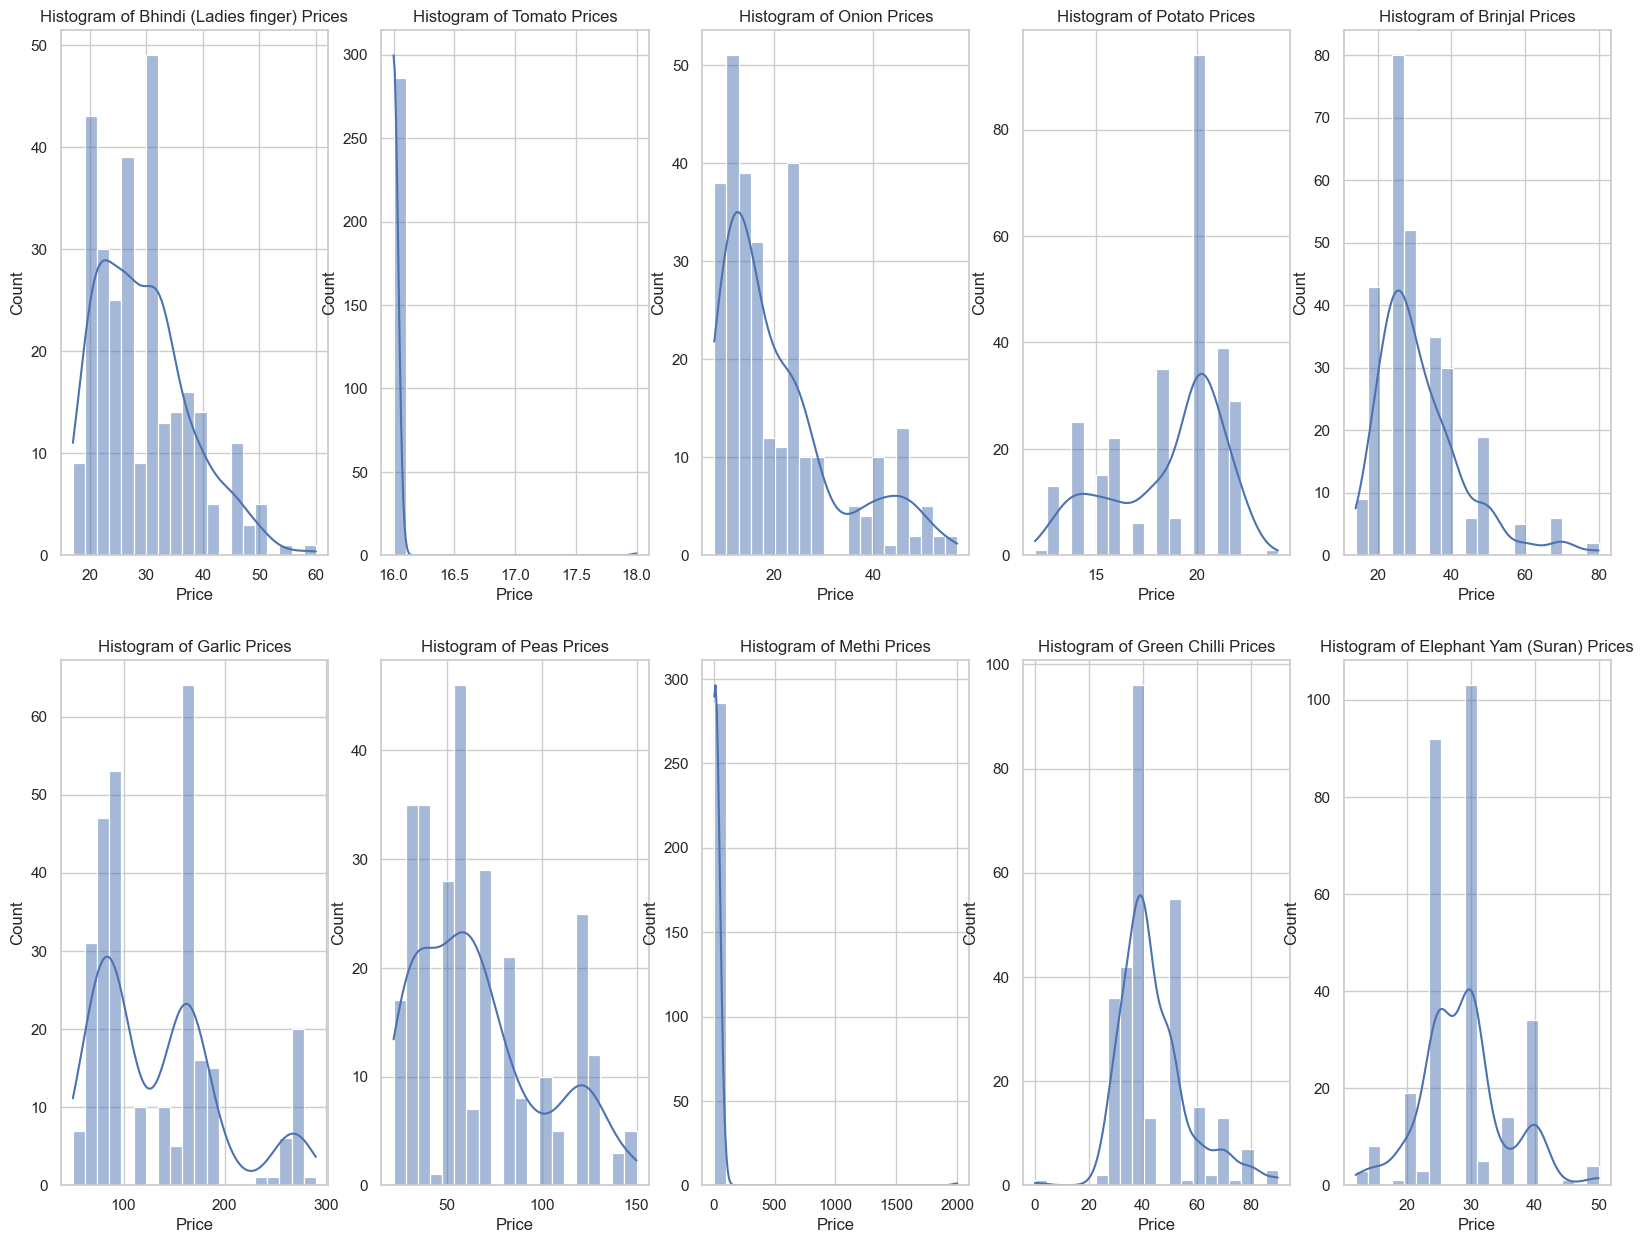

In [67]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(20, 15))

# List of vegetable price columns
vegetable_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Loop through each vegetable column and create histograms and box plots
for i, column in enumerate(vegetable_columns, 1):
    # Histogram
    plt.subplot(2, len(vegetable_columns)//2, i)
    sns.histplot(data=price_df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column} Prices')
    plt.xlabel('Price')


- The analysis indicates that the prices of various vegetables exhibit different distribution patterns. Some vegetables, such as peas, brinjal, onions, and bhindi, display right-skewed distributions, suggesting that their prices tend to be lower more frequently, with occasional spikes in prices. Conversely, yam, green chilli, and garlic exhibit symmetric distributions, indicating a more balanced distribution of prices across the range of values. Methi and tomatoes, on the other hand, demonstrate uniform distributions, suggesting consistent pricing across different price points. 
- The histogram plots also show the distribution of prizes according to different vegetables' count. Some vegetables, such as tomatoes, have high count at low prices, meaning they sell at low prices for high quantities.  Vegetables, including garlic, have low count at higher prices, meaning they sell at high prices for low quantities.

*Data distribution for each vegetable prices*

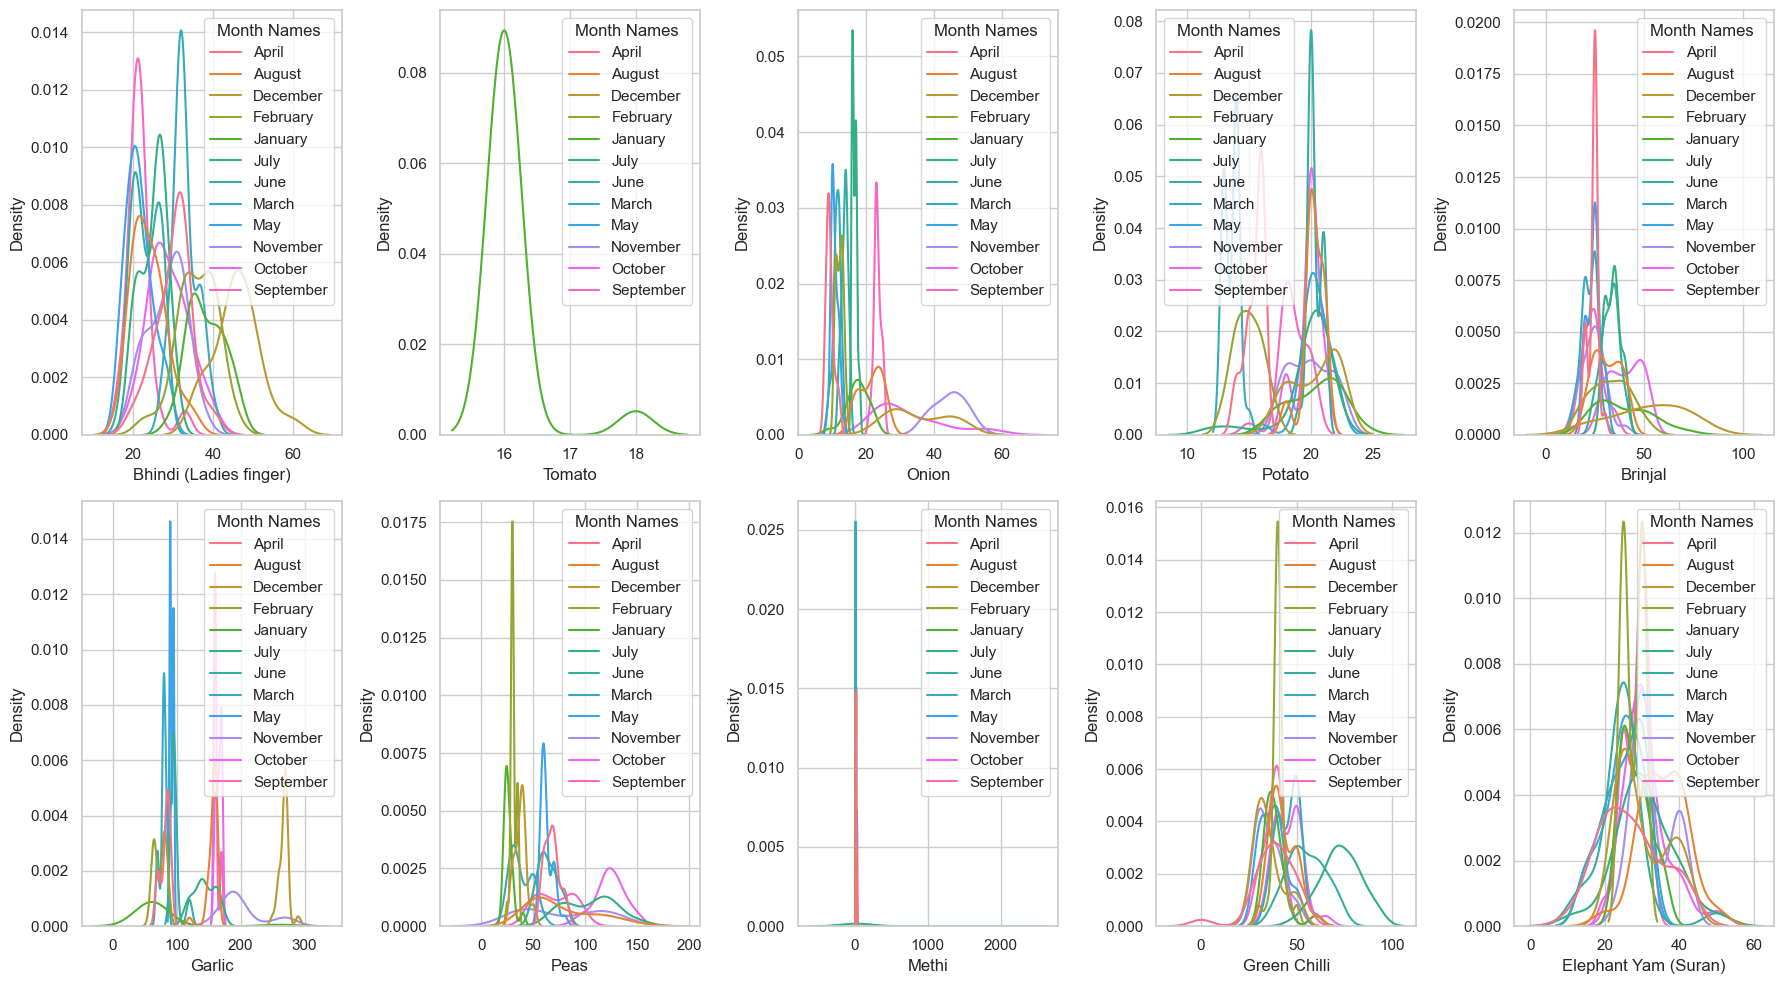

In [68]:
index = 0
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))

for i in range(2):
    for j in range(5):
        if index < len(cols):
            sns.kdeplot(data=price_df, x=cols[index], hue="Month Names", ax=axes[i, j])
            index += 1

plt.tight_layout()
plt.show()

The graph shows that most vegetables have different monthly average prices, show by different peak sizes on the graphs.  Higher peaks display higher monthly average prices

 *Violin Plot*: Visualize the distribution of vegetable prices across different months using a violin plot

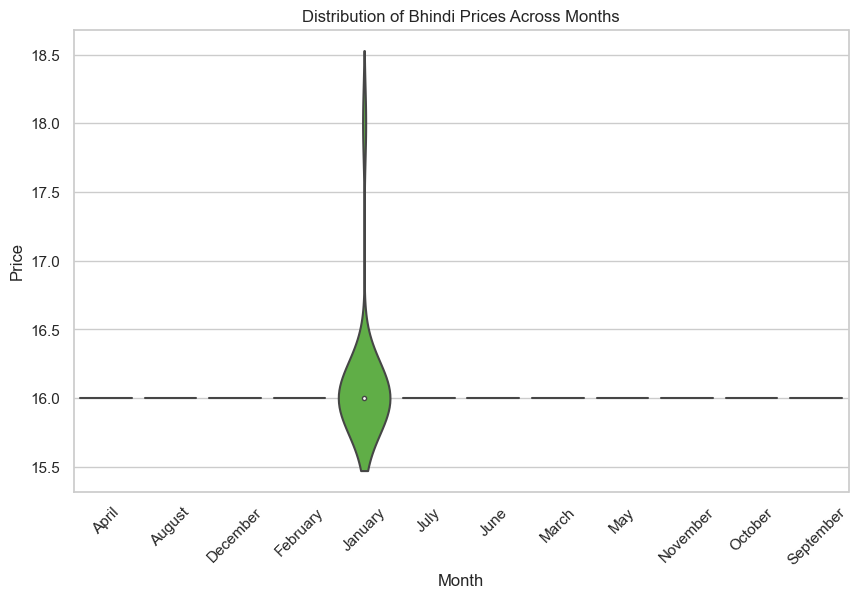

In [75]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=price_df, x='Month Names', y='Tomato') # replce y with any vegetable type for further analysis
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Distribution of Bhindi Prices Across Months')
plt.xticks(rotation=45)
plt.show()


Tomato prices remain costant throughout the year but spikes up on January, what could be the reason behind this?
Definately the law of supply and demand stating that if the supply is higher than the Demand, then the prices will decrease vice versu. This simply means that For `Tomato`, the supply was constantly high but the demand was low througout the year leading to lower prices being set and when the demand  increased on January, the price also increased.

In [70]:
# Create a new feature representing the average price of all vegetables
price_df['Average Price'] = price_df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].mean(axis=1)

# Display the DataFrame with the new feature
price_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Year,Month Names,Average Price
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,2023,January,27.8
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,2023,January,27.5
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,2023,January,27.4
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,2023,January,26.6
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,2023,January,26.0


Text(0.5, 1.0, 'Average Prices Across Months')

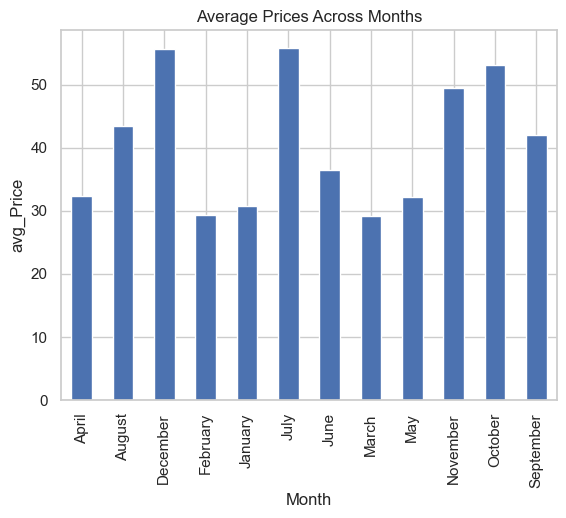

In [71]:
price_df.groupby('Month Names')['Average Price'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('avg_Price')
plt.title('Average Prices Across Months')

Both December and July have the highest price on average as compared to other months


Both February and March have the lowest price on average as compared to other months

# Hypothesis Testing

 `The null hypothesis is that there is no difference in average prices between the two months.`

In [72]:
import scipy
from scipy.stats import ttest_ind

# Hypothesis Testing
# Test whether the average prices of Bhindi (Ladies finger) differ between different months
# Select two months for comparison
month1 = 'January'
month2 = 'February'

# Extract prices of any vegetable for the selected months
bhindi_month1 = price_df[price_df['Month Names'] == month1]['Bhindi (Ladies finger)']
bhindi_month2 = price_df[price_df['Month Names'] == month2]['Bhindi (Ladies finger)']

# Perform independent t-test
t_stat, p_value = ttest_ind(bhindi_month1, bhindi_month2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.558609919206195
P-value: 0.1269665404266687


The test was run multiple times with different vegetables and it showed that there is a diference in average prices between the two months

# Insights

The constant average prices retained by some vegetables, such as potatoes, tomatoes, and elephant yam, are results of the availability of these vegetables met by the demand throughout the year. Some of these vegetables play a crucial role in the production of different food and are used as dietary stable in some areas.
For example, potatoes are important staple crop, available across the world and with the large scale production and consumption (Smith, 1968). They are consumed and sold throughout the year, as they are able to sustain and be grown during different seasons (Smith, 1968).

Some vegetables, including garlic, retained different average throughout the year. This may result from being seasonal crops, require high water availabity, they require very specific soil types, and are high and expensive maintenance (Diriba-Sliferan, 2016).

Vegetables such as garlic,  peas, have the higher average prices during the period of 2 years, this might be the results of high production cost too. Whereas vegetables such as tomatoes, as much as they have constant average prices throughout the year, they still retain lower average prices as they are always available and have low production prices.

# Conclusion

our analysis of vegetable prices in 2023 and 2024 has provided valuable insights into the short-term dynamics of the vegetable market. We observed various trends and fluctuations in prices, which can be attributed to factors such as weather conditions, supply-demand dynamics, and economic policies.
One key finding is the volatility of vegetable prices, which underscores the importance of adaptive strategies for stakeholders across the supply chain. By understanding the underlying drivers of price fluctuations, stakeholders can better navigate market uncertainties and optimize their operations.
Moving forward, continuous monitoring and analysis of vegetable prices will be essential for stakeholders to stay responsive to changing market conditions. Additionally, further research into long-term trends and broader market dynamics will provide deeper insights into the vegetable market's evolution over time.
Overall, this analysis serves as a valuable resource for stakeholders seeking to make informed decisions and strategic plans in the ever-changing landscape of the vegetable market.

# Recomendations
1. *Implement Adaptive Pricing Strategies*: Develop adaptive pricing strategies that can quickly respond to market fluctuations. 

2. *Diversify Sourcing and Supply Chains*: To mitigate risks associated with supply disruptions or price spikes in specific regions, consider diversifying sourcing locations and supply chains. 

3. *Invest in Data Analytics and Market Intelligence*: Leverage data analytics and market intelligence tools to gain deeper insights into consumer preferences, market trends, and competitor strategies. 

4. *Educate Consumers and Promote Healthy Eating*: Educate consumers about the nutritional benefits of vegetables and promote healthy eating habits through marketing campaigns and educational initiatives.

5. *Explore Value-Added Products and Services*: Consider diversifying product offerings by exploring value-added products and services such as pre-cut vegetables, meal kits, and ready-to-eat salads. This can cater to changing consumer lifestyles and preferences while creating new revenue streams for stakeholders.



# References

1.Smith, O., 1968. Potatoes: production, storing, processing. CABI database.

2.Diriba-Sliferan, G., 2016. Review of management strategies of constraints in garlic (Allium sativum L) production. Journal of Agricultural Sciences, 11, 186-207.